# DATA EXPLORARTION

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv('C://Users//SHONIMA S//OneDrive//Documents//entry project//Employee_data_.csv', delimiter=',')

In [12]:
data.head()

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [13]:
data.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    14998 non-null  object 
 1   satisfaction_level      14999 non-null  float64
 2   last_evaluation         14999 non-null  float64
 3   number_projects         14999 non-null  int64  
 4   average_monthly_hours   14999 non-null  int64  
 5   time_spent_company      14999 non-null  int64  
 6   work_accident           14999 non-null  int64  
 7   left                    14999 non-null  int64  
 8   promotion_last_5_years  14999 non-null  int64  
 9   department              14999 non-null  object 
 10  salary                  14999 non-null  object 
 11  salary_level            14999 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1.4+ MB


In [15]:
data.isnull().values.any()     #checking null values

True

In [16]:
data.drop_duplicates()       #remove duplicate rows

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,WELDY,0.40,0.57,2,151,3,0,1,0,support,low,1
14995,VINTON,0.37,0.48,2,160,3,0,1,0,support,low,1
14996,SALIBA,0.37,0.53,2,143,3,0,1,0,support,low,1
14997,PARMAR,0.11,0.96,6,280,4,0,1,0,support,low,1


In [17]:
data.apply(lambda x: sum(x.isnull()))

name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
salary_level              0
dtype: int64

In [18]:
data[data['left']==1].shape[0]    # Number of employees that left

3571

In [20]:
data[data['left']==0].shape[0]    # Number of employees that are still working there

11428

In [21]:
group_a = data[data['left']==1].mean()    # Divide working employees and those who left in different groups
print(group_a)

satisfaction_level          0.440098
last_evaluation             0.718113
number_projects             3.855503
average_monthly_hours     207.419210
time_spent_company          3.876505
work_accident               0.047326
left                        1.000000
promotion_last_5_years      0.005321
salary_level                1.414730
dtype: float64


In [22]:
group_b = data[data['left']==0].mean()    # Divide working employees and those who do not left in different groups
print(group_b)

satisfaction_level          0.666810
last_evaluation             0.715473
number_projects             3.786664
average_monthly_hours     199.060203
time_spent_company          3.380032
work_accident               0.175009
left                        0.000000
promotion_last_5_years      0.026251
salary_level                1.650945
dtype: float64


In [24]:
from scipy import stats

In [28]:
#1. Detecting Outliers Using Z-Score
# Calculate Z-scores for the numerical columns
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Set a threshold to detect outliers (commonly 3)
threshold = 3
outliers = np.where(z_scores > threshold)

# Print the row indices where outliers are detected
print("Outlier rows based on Z-score:", outliers[0])

Outlier rows based on Z-score: [   18    82   171   287   584   751  1000  1667  4499  4500  4501  4502
  4503  4504  4505  4506  4507  4508  4509  4510  4511  4512  4536  4537
  4538  4539  4540  4541  4542  4543  4544  4545  4546  4547  4548  4549
  4550  4551  4552  4553  4554  4555  4556  4557  4558  4727  4728  4729
  4730  4731  4732  4733  4734  4735  4736  4737  4738  5031  5032  5033
  5034  5035  5036  5037  5038  5039  5040  5041  5042  5055  5056  5057
  5058  5059  5060  5115  5116  5117  5118  5119  5120  5121  5122  5518
  5519  5520  5521  5522  5523  5524  5525  5526  5527  5528  5529  5530
  5531  5532 10776 10777 10778 10779 10780 10855 10856 10857 10858 10859
 10933 10934 10935 10936 10937 10938 10939 10940 10941 10942 11007 11008
 11009 11010 11011 11078 11079 11080 11081 11082 11083 11124 11125 11126
 11127 11128 11129 11179 11180 11181 11182 11183 11184 11185 11186 11193
 11194 11195 11196 11197 11198 11199 11213 11214 11214 11215 11215 11216
 11216 11217 11217 1

In [29]:
#2.Detecting Outliers Using IQR:
# Calculate IQR for each numerical column
Q1 = data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows where any column value is outside the IQR bounds
outliers_iqr = data[(data.select_dtypes(include=[np.number]) < lower_bound) | (data.select_dtypes(include=[np.number]) > upper_bound)]

print("Outliers based on IQR:")
print(outliers_iqr)


Outliers based on IQR:
      name  satisfaction_level  last_evaluation  number_projects  \
0      NaN                 NaN              NaN              NaN   
1      NaN                 NaN              NaN              NaN   
2      NaN                 NaN              NaN              NaN   
3      NaN                 NaN              NaN              NaN   
4      NaN                 NaN              NaN              NaN   
...    ...                 ...              ...              ...   
14994  NaN                 NaN              NaN              NaN   
14995  NaN                 NaN              NaN              NaN   
14996  NaN                 NaN              NaN              NaN   
14997  NaN                 NaN              NaN              NaN   
14998  NaN                 NaN              NaN              NaN   

       average_monthly_hours  time_spent_company  work_accident  left  \
0                        NaN                 NaN            NaN   1.0   
1             

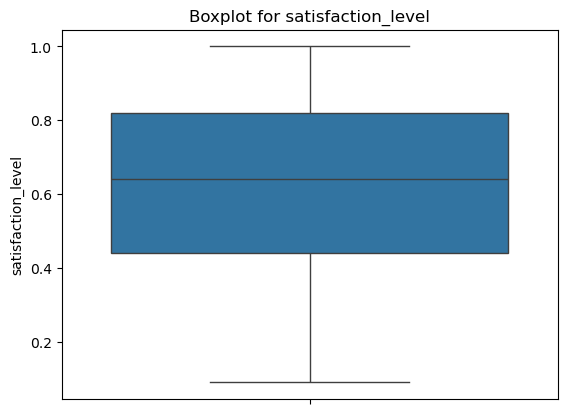

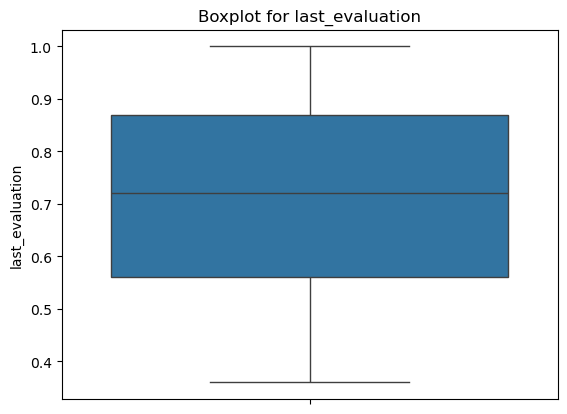

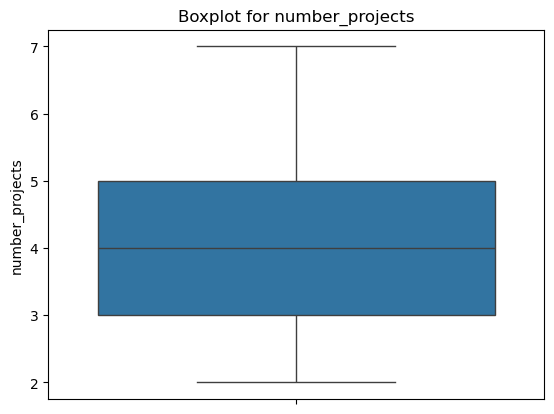

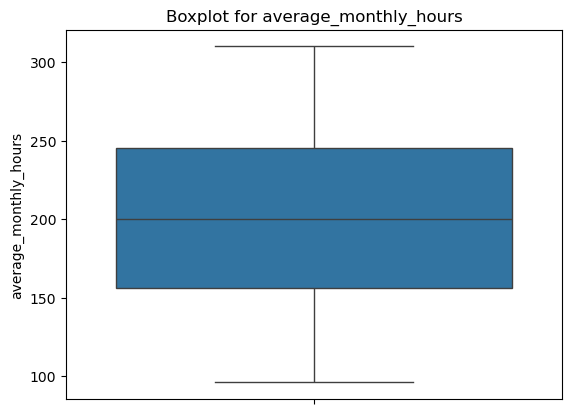

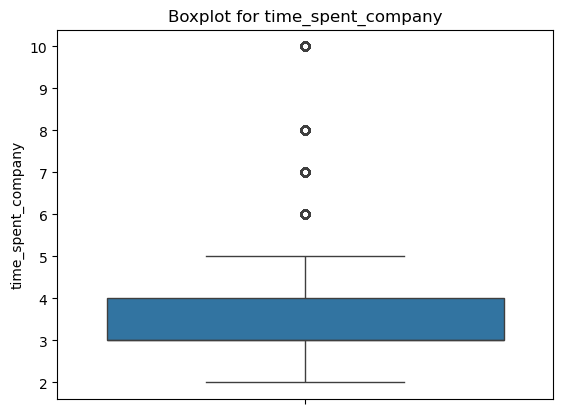

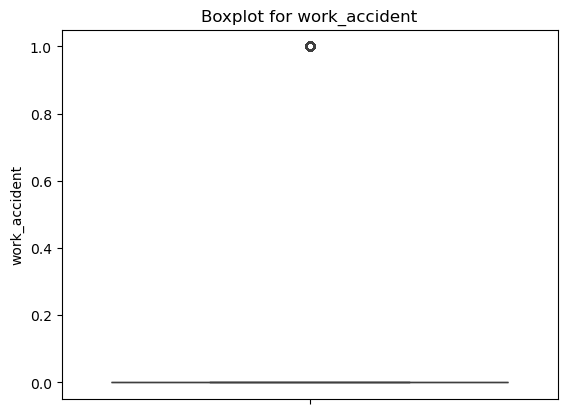

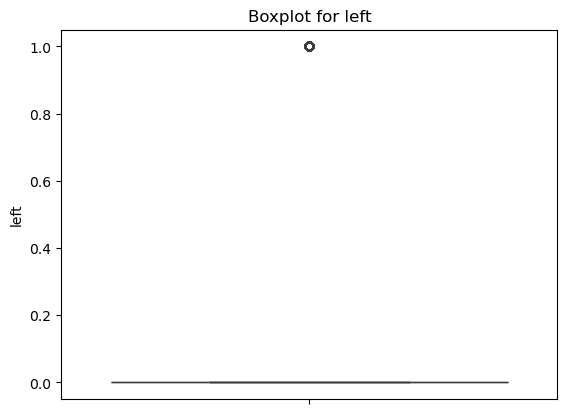

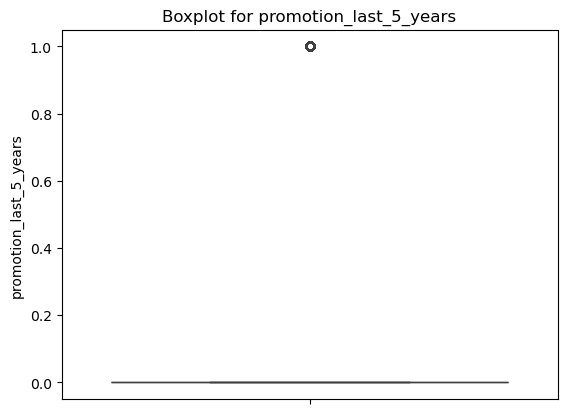

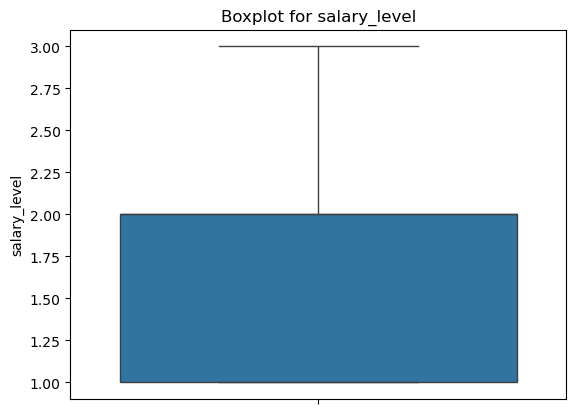

In [33]:
#Visualizing Outliers Using Boxplots:
# Plot boxplots for numerical columns to detect outliers visually
numerical_cols = data.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [34]:
#Check Skewness
# Check skewness of each column
skewness = data.skew()
print(skewness)


satisfaction_level       -0.476360
last_evaluation          -0.026622
number_projects           0.337706
average_monthly_hours     0.052842
time_spent_company        1.853319
work_accident             2.021149
left                      1.230043
promotion_last_5_years    6.636968
salary_level              0.598882
dtype: float64


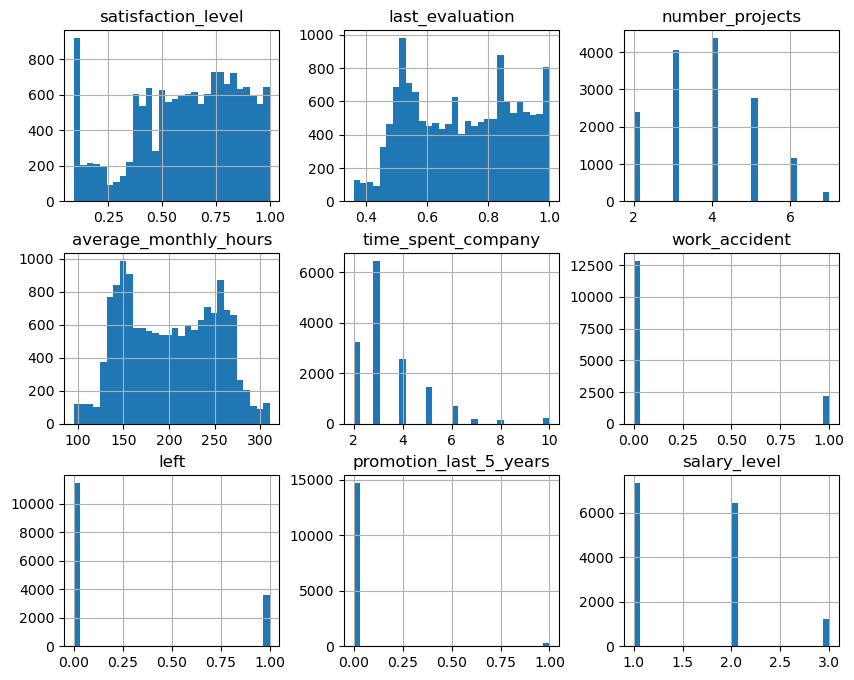

In [35]:
#Visualize Skewness 
# Visualize distribution of columns with skewed data
data.hist(bins=30, figsize=(10, 8))
plt.show()

In [ ]:
#Correcting Skewness
# Apply log transformation to skewed columns
data['ColumnName'] = np.log1p(data['ColumnName'])  # log(1 + value) to avoid log(0) errors

<Axes: >

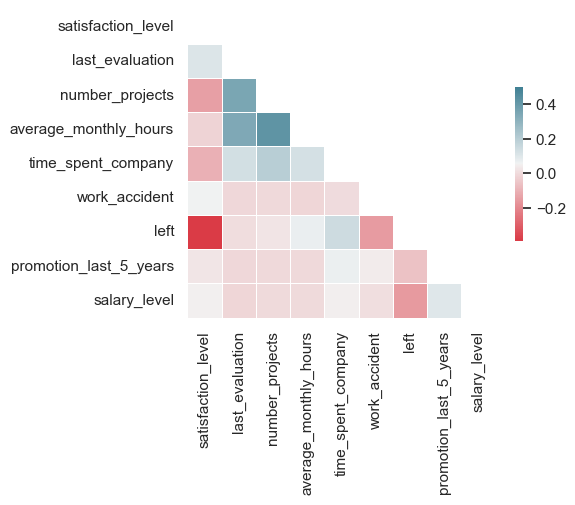

In [37]:
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

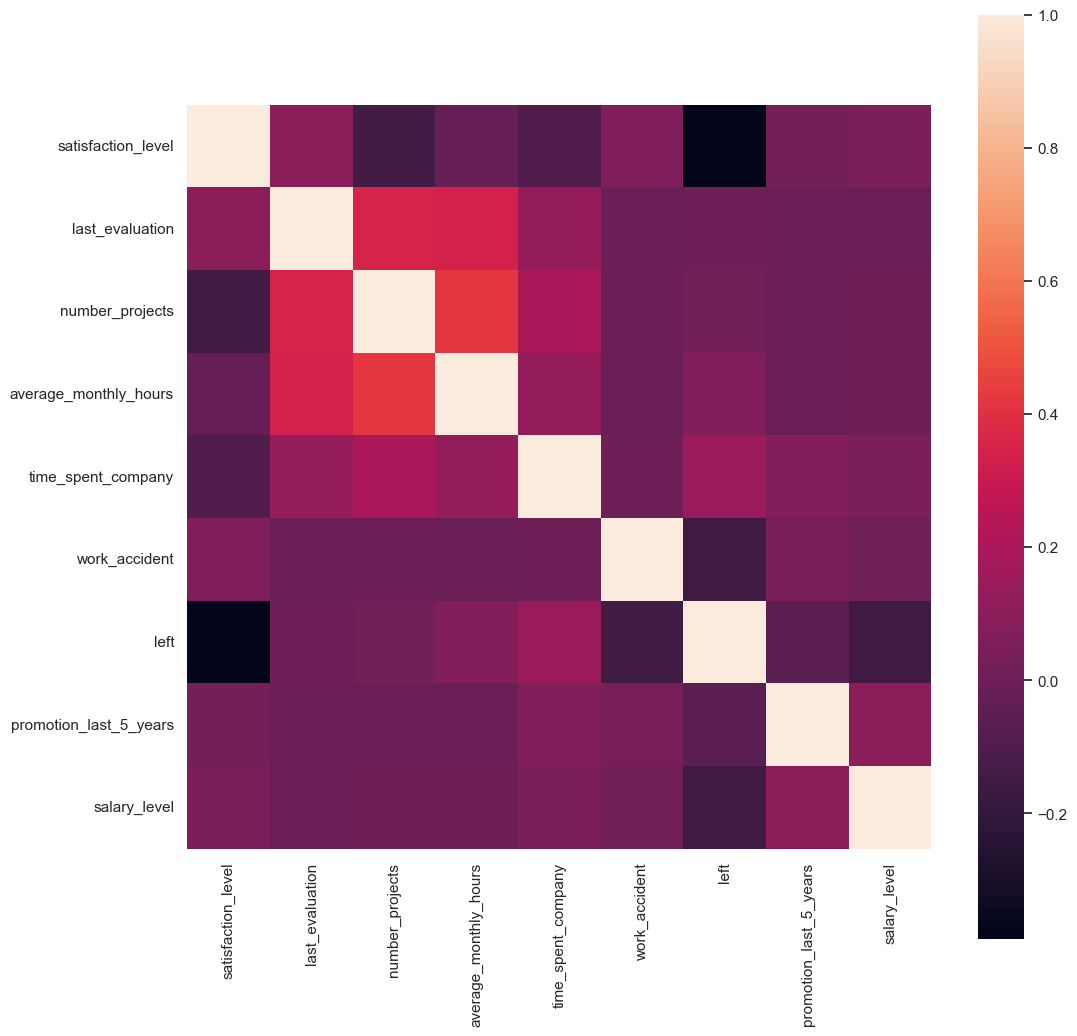

In [38]:
# Creating the heatmap of correlation matrix
corr = data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True)
plt.show()

In [39]:
corr # Printing the correlation matrix

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spent_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5_years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary_level,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


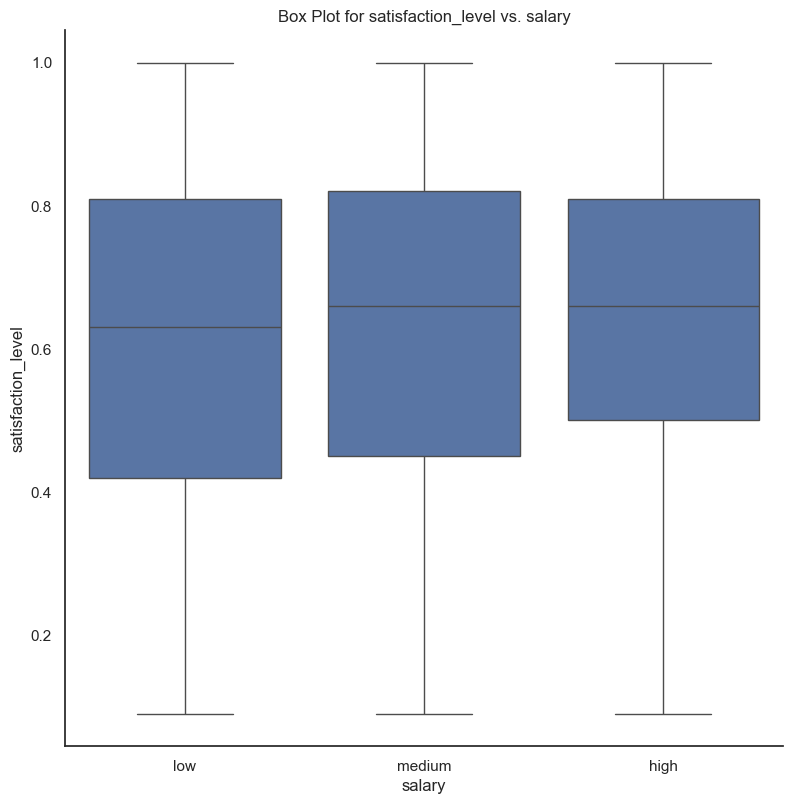

In [41]:
sns.catplot(data=data, x='salary', y='satisfaction_level', kind='box', height=8)
plt.title('Box Plot for satisfaction_level vs. salary')
plt.show()


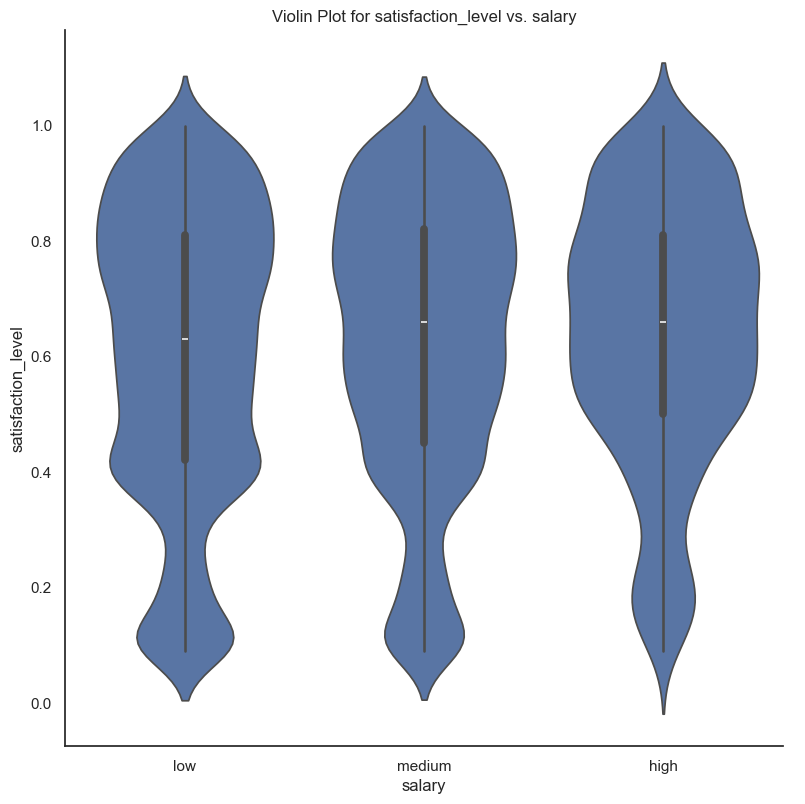

In [42]:
sns.catplot(data=data, x='salary', y='satisfaction_level', kind='violin', height=8)
plt.title('Violin Plot for satisfaction_level vs. salary')
plt.show()


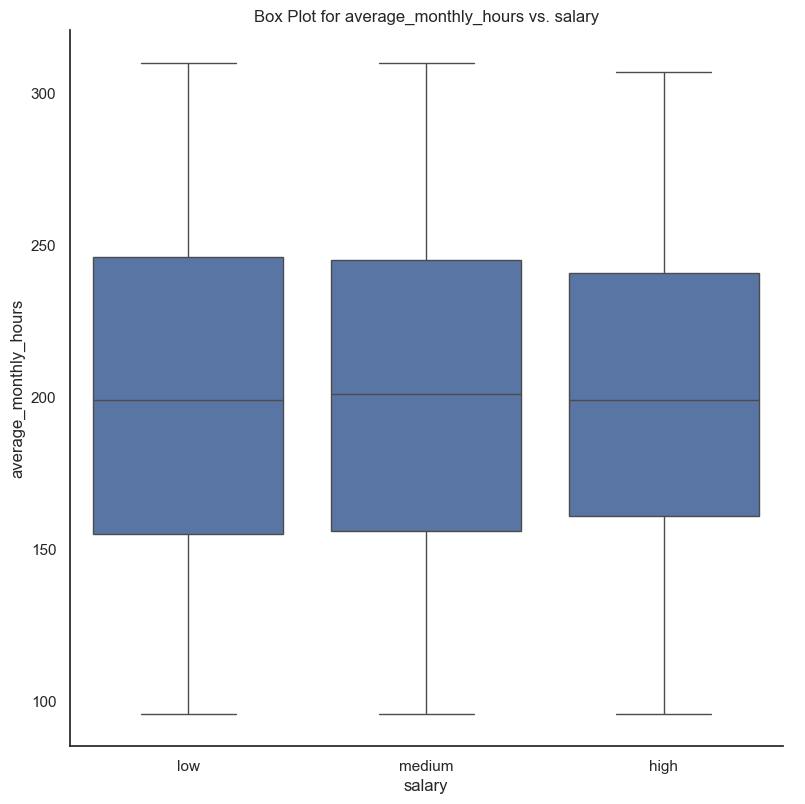

In [43]:
sns.catplot(data=data, x='salary', y='average_monthly_hours', kind='box', height=8)
plt.title('Box Plot for average_monthly_hours vs. salary')
plt.show()


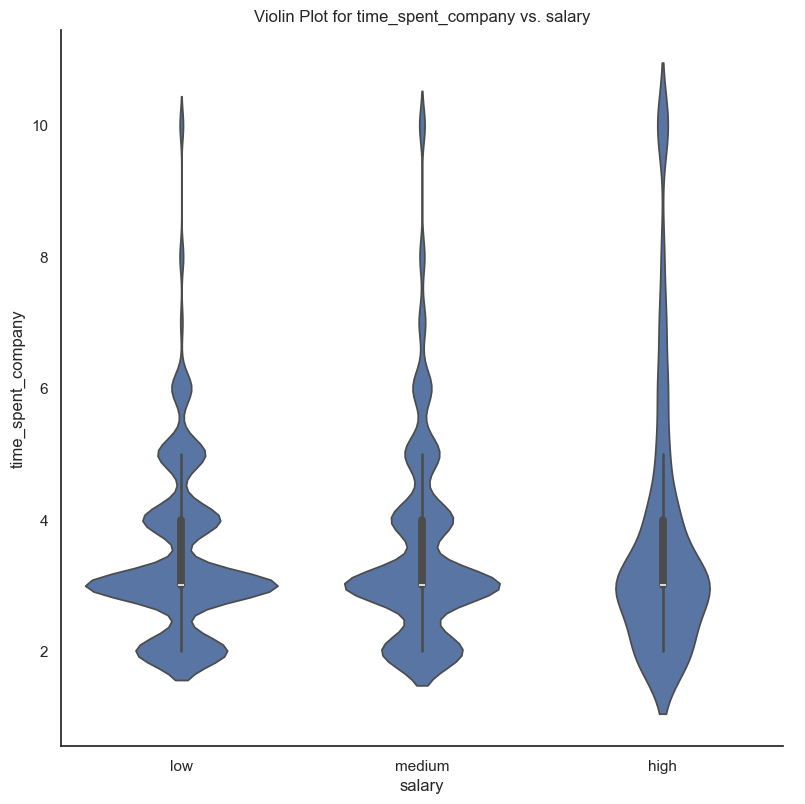

In [44]:
sns.catplot(data=data, x='salary', y='time_spent_company', kind='violin', height=8)
plt.title('Violin Plot for time_spent_company vs. salary')
plt.show()


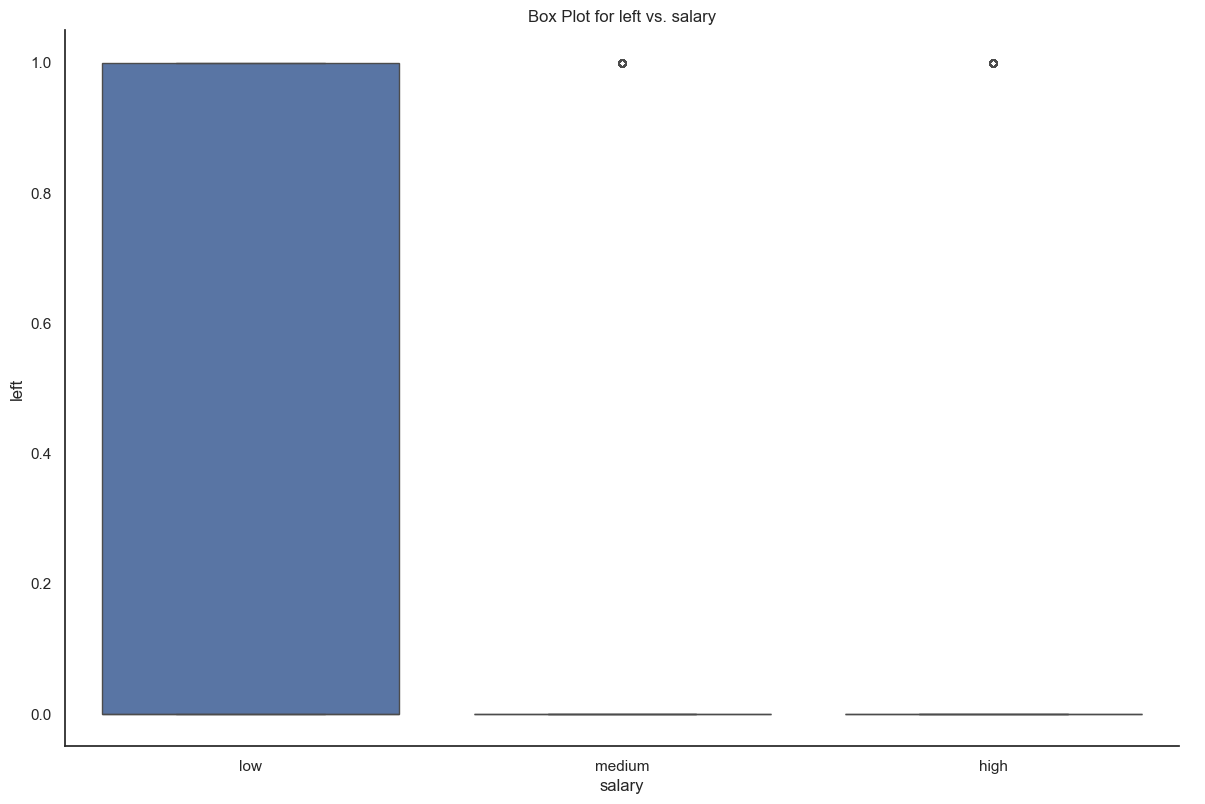

In [45]:
sns.catplot(data=data, x='salary', y='left', kind='box', height=8, aspect=1.5)
plt.title('Box Plot for left vs. salary')
plt.show()


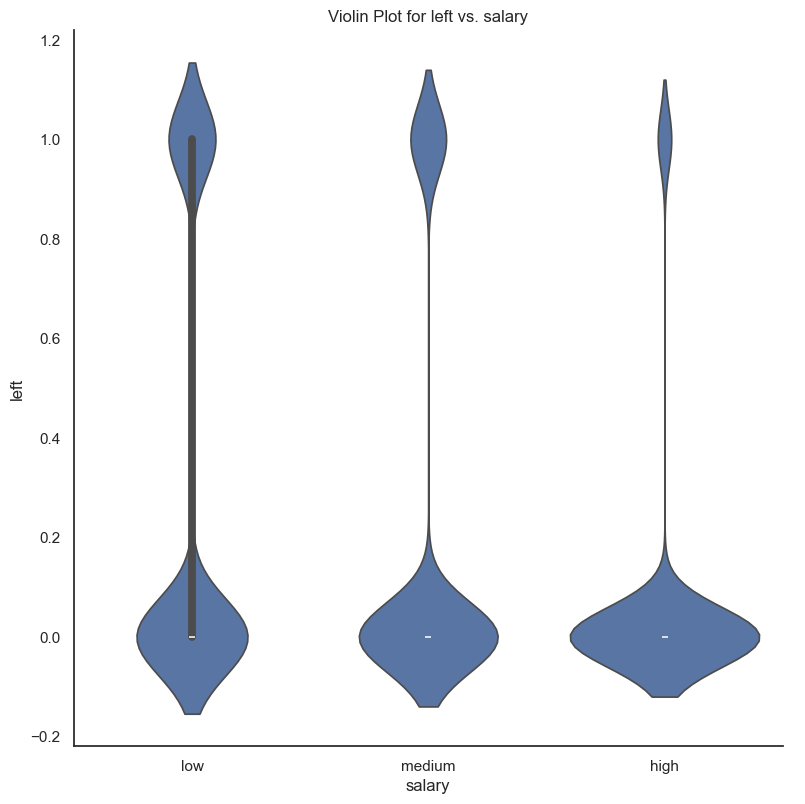

In [46]:
# Corrected code using sns.catplot
sns.catplot(data=data, x='salary', y='left', kind='violin', height=8)
plt.title('Violin Plot for left vs. salary')
plt.show()


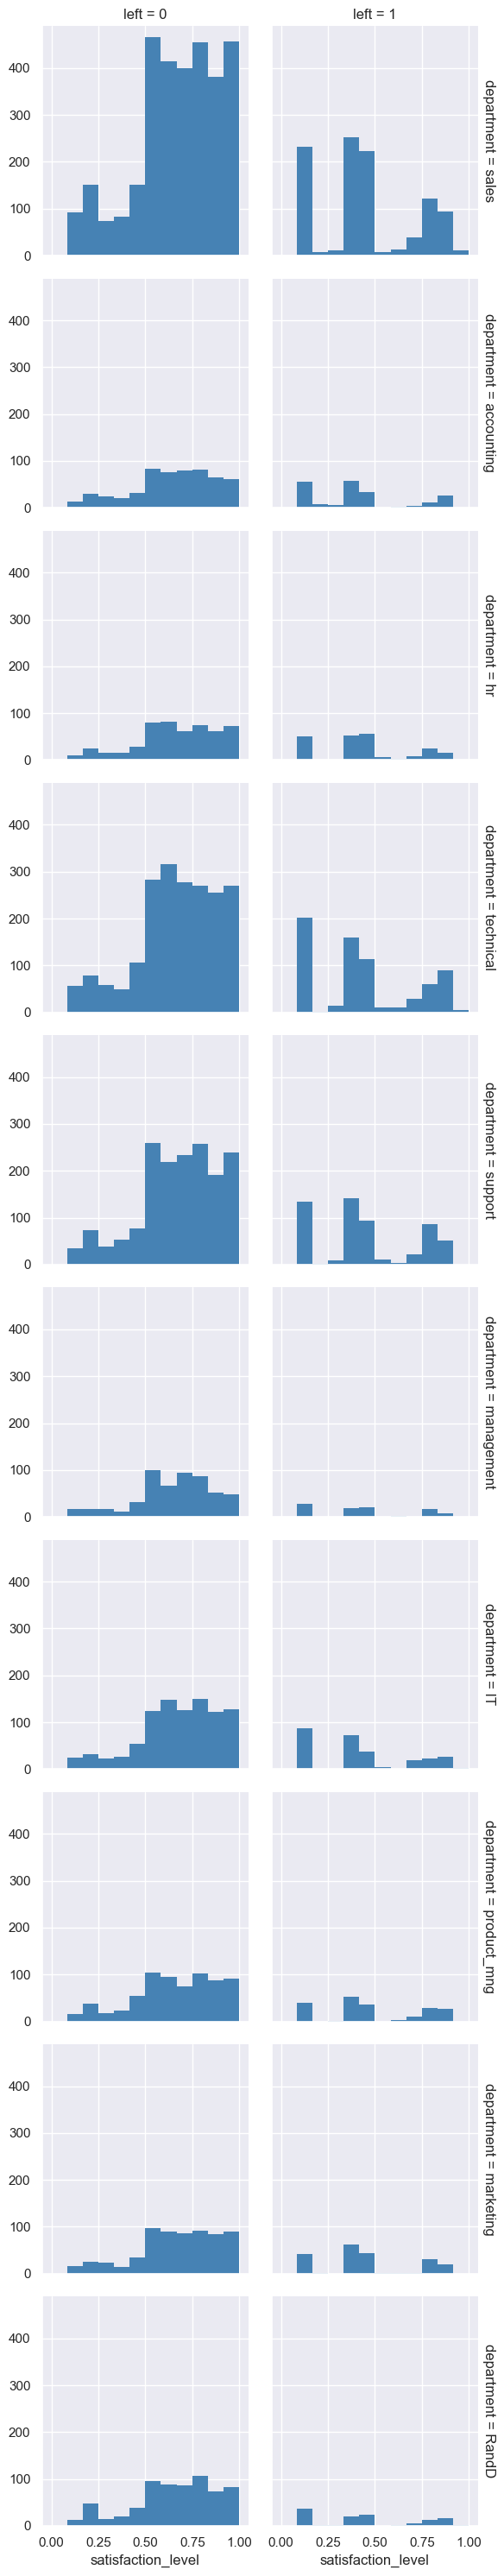

In [47]:
sns.set(style="darkgrid")
g = sns.FacetGrid(data, row="department", col="left", margin_titles=True)
bins = np.linspace(0, 1, 13)
g.map(plt.hist, "satisfaction_level", color="steelblue", bins=bins, lw=0)

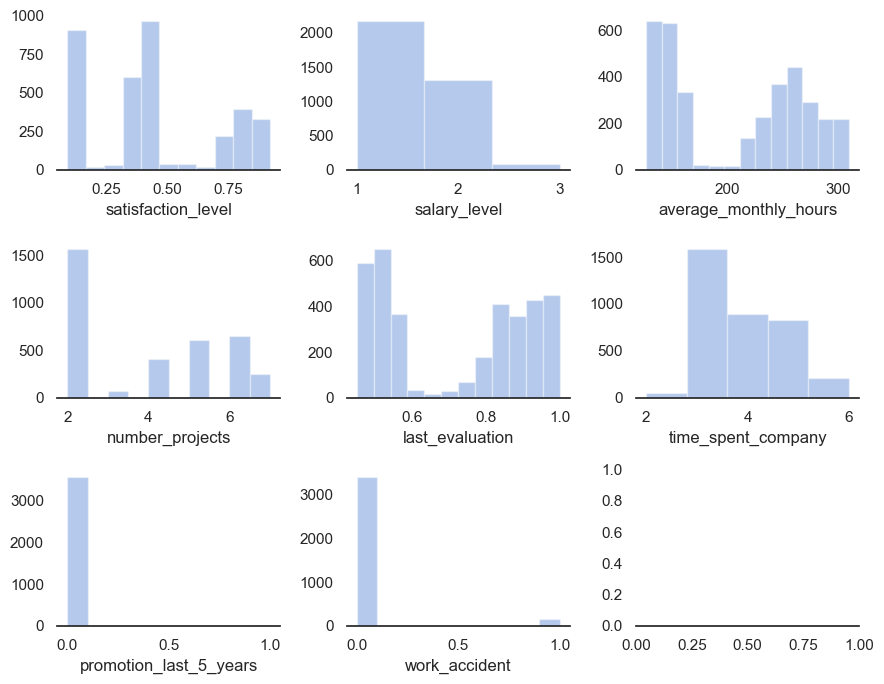

In [48]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9,7))
sns.despine(left=True)

#people that left
leavers = data.loc[data['left'] == 1]

# Plot a simple histogram with binsize determined automatically
sns.distplot(leavers['satisfaction_level'], kde=False, color="b", ax=axes[0,0])
sns.distplot(leavers['salary_level'], bins=3, kde=False, color="b", ax=axes[0, 1])
sns.distplot(leavers['average_monthly_hours'], kde=False, color="b", ax=axes[0, 2])
sns.distplot(leavers['number_projects'], kde=False, color="b", ax=axes[1,0])
sns.distplot(leavers['last_evaluation'], kde=False, color="b", ax=axes[1, 1])
sns.distplot(leavers['time_spent_company'], kde=False, bins=5, color="b", ax=axes[1, 2])
sns.distplot(leavers['promotion_last_5_years'],bins=10, kde=False, color="b", ax=axes[2,0])
sns.distplot(leavers['work_accident'], bins=10,kde=False, color="b", ax=axes[2, 1])


plt.tight_layout()

In [49]:
print("So, from the plots we can see that most of the employees that left the company left because of thefoloowing reasons -:\n1.salary average_montly_hours \n2.satisfaction_level\n3.last_evaluation")

So, from the plots we can see that most of the employees that left the company left because of thefoloowing reasons -:
1.salary average_montly_hours 
2.satisfaction_level
3.last_evaluation


In [50]:
df = pd.DataFrame(data)
df2 = pd.get_dummies(df['salary'], prefix="salary", prefix_sep="_", drop_first=True)
#df2=pd.get_dummies(df,columns=['salary'])
# df2.dtypes
# df2.head()
df3 = pd.concat([df,df2], axis=1)
df3.drop('salary', axis=1, inplace=True)
df3.drop('department', axis=1, inplace=True)
df3.drop('name', axis=1, inplace=True)
df3.head(1000)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,1,0
1,0.80,0.86,5,262,6,0,1,0,2,0,1
2,0.11,0.88,7,272,4,0,1,0,2,0,1
3,0.72,0.87,5,223,5,0,1,0,1,1,0
4,0.37,0.52,2,159,3,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.38,0.46,2,144,3,0,1,0,1,1,0
996,0.38,0.54,2,157,3,0,1,0,2,0,1
997,0.86,0.94,5,224,5,0,1,0,2,0,1
998,0.37,0.46,2,155,3,0,1,0,2,0,1


In [53]:
# Your existing code
X = df3.loc[:, df3.columns != 'left']
Y = df3.loc[:, df3.columns == 'left']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

# Check the first few rows of the training data
X_train.head()


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,promotion_last_5_years,salary_level,salary_low,salary_medium
14404,0.09,0.82,6,249,4,0,0,2,0,1
2157,0.67,0.54,2,141,2,0,0,1,1,0
4249,0.95,0.81,3,260,2,0,0,1,1,0
13811,0.95,0.75,4,151,3,0,0,2,0,1
5625,0.64,0.57,3,179,3,0,0,2,0,1


In [52]:
# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Example prediction
predictions = clf.predict(X_test)
print(predictions)


[1 1 1 ... 0 0 0]


In [55]:
clf = RandomForestClassifier()

In [56]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [57]:
pred = clf.predict(X_test)

In [58]:
acc = accuracy_score(Y_test, pred)
print("Accuracy:", acc)


Accuracy: 0.9922222222222222


In [59]:
print("Accuracy of the algorithm: ", acc)
print("Total number of employees which are likely to leave: ", sum(pred))

Accuracy of the algorithm:  0.9922222222222222
Total number of employees which are likely to leave:  1068


In [62]:
df4 = df3[df3['left']==0]
df4.head()
df4.drop('left', axis=1, inplace=True)
df4.head()
a = df4.values

prob = clf.predict_proba(a)
prob

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [63]:
print('Number of employees that will definitely leave: ', sum(prob[:, 1]==1))

Number of employees that will definitely leave:  4


In [64]:
print(prob.shape)
print(df4.shape)


(11428, 2)
(11428, 10)


In [66]:
df4['SoonLeave'] = prob[:, 1]
df4[df4['SoonLeave'] > 0.5]

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,promotion_last_5_years,salary_level,salary_low,salary_medium,SoonLeave
2095,0.54,0.67,4,282,6,0,0,2,0,1,0.72
5565,0.84,0.84,6,261,5,0,0,1,1,0,0.51
5847,0.77,0.85,5,221,5,0,0,1,1,0,0.98
6358,0.81,0.98,5,243,6,0,0,2,0,1,1.00
6466,0.39,0.57,2,132,3,0,0,1,1,0,1.00
7762,0.82,0.87,5,273,6,0,0,2,0,1,1.00
9781,0.42,0.50,2,151,3,0,0,1,1,0,1.00


In [67]:
soonleave = sum(prob[:, 1] > 0.5)
soonleave
print('So, ' + str(soonleave) + ' employees will soon leave the company.')
 

So, 7 employees will soon leave the company.
